# CS231n课程笔记翻译：Python Numpy教程

译者注：本文智能单元首发，翻译自斯坦福CS231n课程笔记Python Numpy Tutorial，由课程教师Andrej Karpathy授权进行翻译。本篇教程由杜客翻译完成，Flood Sung、SunisDown、巩子嘉和一位不愿透露ID的知友对本翻译亦有贡献。

原文如下

这篇教程由Justin Johnson创作。

我们将使用Python编程语言来完成本课程的所有作业。Python是一门伟大的通用编程语言，在一些常用库（numpy, scipy, matplotlib）的帮助下，它又会变成一个强大的科学计算环境。

我们期望你们中大多数人对于Python语言和Numpy库比较熟悉，而对于没有Python经验的同学，这篇教程可以帮助你们快速了解Python编程环境和如何使用Python作为科学计算工具。

一部分同学对于Matlab有一定经验。对于这部分同学，我们推荐阅读 numpy for Matlab users页面。

你们还可以查看本教程的IPython notebook版。该教程是由Volodymyr Kuleshov和Isaac Caswell为课程CS 228创建的。

内容列表：

    Python
        基本数据类型容器
            列表
            字典
            集合
            元组
        函数
        类
     Numpy
        数组
        访问数组
        数据类型
        数组计算
        广播
     SciPy
        图像操作
        MATLAB文件
        点之间的距离
     Matplotlib
        绘制图形
        绘制多个图形
        图像

Python

Python是一种高级的，动态类型的多范型编程语言。很多时候，大家会说Python看起来简直和伪代码一样，这是因为你能够通过很少行数的代码表达出很有力的思想。举个例子，下面是用Python实现的经典的quicksort算法例子：

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[int(len(arr) / 2)]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    print("pivot:", pivot) 
    print("left:", left) 
    print("middle:", middle) 
    print("right:", right) 
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

pivot: 10
left: [3, 6, 8, 1, 2, 1]
middle: [10]
right: []
pivot: 1
left: []
middle: [1, 1]
right: [3, 6, 8, 2]
pivot: 8
left: [3, 6, 2]
middle: [8]
right: []
pivot: 6
left: [3, 2]
middle: [6]
right: []
pivot: 2
left: []
middle: [2]
right: [3]
[1, 1, 2, 3, 6, 8, 10]


Python有两个支持的版本，分别是2.7和3.5。这有点让人迷惑，3.0向语言中引入了很多不向后兼容的变化，2.7下的代码有时候在3.5下是行不通的。在这个课程中，我们使用的是3.5版本。

如何查看版本呢？使用python --version命令。
基本数据类型

和大多数编程语言一样，Python拥有一系列的基本数据类型，比如整型、浮点型、布尔型和字符串等。这些类型的使用方式和在其他语言中的使用方式是类似的。

数字：整型和浮点型的使用与其他语言类似。

In [1]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


需要注意的是，Python中没有 x++ 和 x-- 的操作符。
Python也有内置的长整型和复杂数字类型，具体细节可以查看文档。

布尔型：Python实现了所有的布尔逻辑，但用的是英语，而不是我们习惯的操作符（比如&&和||等）。

In [2]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


字符串：Python对字符串的支持非常棒。

In [3]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello
5
hello world
hello world 12


字符串对象有一系列有用的方法，比如：

In [11]:
s = "hello"
print(s.capitalize()) # Capitalize a string; prints "Hello"
print(s.upper()) # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7)) # Right-justify a string, padding with spaces; prints "  hello" 
print(s.center(7)) # Center a string, padding with spaces; prints " hello " 
print(s.replace('l', '(ell)')) # Replace all instances of one substring with another; 
                             # prints "he(ell)(ell)o" 
print('  world '.strip()) # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


如果想详细查看字符串方法，请看文档。

容器Containers

译者注：有知友建议container翻译为复合数据类型，供读者参考。

Python有以下几种容器类型：列表（lists）、字典（dictionaries）、集合（sets）和元组（tuples）。

列表Lists

列表就是Python中的数组，但是列表长度可变，且能包含不同类型元素。

In [4]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


列表的细节，同样可以查阅文档。

切片Slicing：为了一次性地获取列表中的元素，Python提供了一种简洁的语法，这就是切片。

In [17]:
nums = list(range(5)) # range is a built-in function that creates a list of integers
print(nums) # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4]) # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:]) # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2]) # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:]) # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print (nums[:-1]) # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums) # Prints "[0, 1, 8, 8, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


在Numpy数组的内容中，我们会再次看到切片语法。

循环Loops：我们可以这样遍历列表中的每一个元素：

In [18]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


如果想要在循环体内访问每个元素的指针，可以使用内置的enumerate函数

In [19]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: monkey


列表推导List comprehensions：在编程的时候，我们常常想要将一种数据类型转换为另一种。下面是一个简单例子，将列表中的每个元素变成它的平方。

In [20]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


使用列表推导，你就可以让代码简化很多：

In [21]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


列表推导还可以包含条件：

In [22]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


字典Dictionaries
字典用来储存（键, 值）对，这和Java中的Map差不多。你可以这样使用它：

In [5]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

cute
True
wet
N/A
wet
N/A


想要知道字典的其他特性，请查阅文档。

循环Loops：在字典中，用键来迭代更加容易。

In [28]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


如果你想要访问键和对应的值，那就使用iteritems方法：

In [29]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


字典推导Dictionary comprehensions：和列表推导类似，但是允许你方便地构建字典。

In [30]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


集合Sets
集合是独立不同个体的无序集合。示例如下：

In [6]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


和前面一样，要知道更详细的，查看文档。

循环Loops：在集合中循环的语法和在列表中一样，但是集合是无序的，所以你在访问集合的元素的时候，不能做关于顺序的假设。

In [34]:
animals = {'cat', 'dog', 'fish'} 
for idx, animal in enumerate(animals): 
    print('#%d: %s' % (idx + 1, animal)) 
print(animals) # Prints "#1: fish", "#2: dog", "#3: cat"

#1: dog
#2: fish
#3: cat
{'dog', 'fish', 'cat'}


集合推导Set comprehensions：和字典推导一样，可以很方便地构建集合：

In [35]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


元组Tuples
元组是一个值的有序列表（不可改变）。从很多方面来说，元组和列表都很相似。和列表最重要的不同在于，元组可以在字典中用作键，还可以作为集合的元素，而列表不行。例子如下：

In [36]:
d = {(x, x + 1): x for x in range(10)} # Create a dictionary with tuple keys
print(d) 
t = (5, 6) # Create a tuple 
print(type(t)) 
print(d[t]) 
print(d[(1, 2)])

{(0, 1): 0, (1, 2): 1, (2, 3): 2, (3, 4): 3, (4, 5): 4, (5, 6): 5, (6, 7): 6, (7, 8): 7, (8, 9): 8, (9, 10): 9}
<class 'tuple'>
5
1


文档有更多元组的信息。

函数Functions
Python函数使用def来定义函数：

In [38]:
def sign(x): 
    if x > 0: 
        return 'positive'
    elif x < 0: 
        return 'negative'
    else: 
        return 'zero' 
    
for x in [-1, 0, 1]: 
    print(sign(x))

negative
zero
positive


我们常常使用可选参数来定义函数：

In [39]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)
hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


函数还有很多内容，可以查看文档。

类Classes

Python对于类的定义是简单直接的：

In [40]:
class Greeter:
    
    # Constructor 
    def __init__(self, name): 
        self.name = name # Create an instance variable 
    
    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else: 
            print('Hello, %s' % self.name)
g = Greeter('Fred') # Construct an instance of the Greeter class
g.greet() # Call an instance method; prints "Hello, Fred"
g.greet(loud=True) # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


更多类的信息请查阅文档。

Numpy

Numpy是Python中用于科学计算的核心库。它提供了高性能的多维数组对象，以及相关工具。
数组Arrays

一个numpy数组是一个由不同数值组成的网格。网格中的数据都是同一种数据类型，可以通过非负整型数的元组来访问。维度的数量被称为数组的阶，数组的大小是一个由整型数构成的元组，可以描述数组不同维度上的大小。

我们可以从列表创建数组，然后利用方括号访问其中的元素：

In [7]:
import numpy as np
a = np.array([1, 2, 3]) # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5 # Change an element of the array
print(a)

b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)
print(b.shape)                   
print(b[0, 0], b[0, 1], b[1, 0])

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


Numpy还提供了很多其他创建数组的方法：

In [43]:
a = np.zeros((2,2)) # Create an array of all zeros
print(a)
b = np.ones((2,2)) # Create an array of all ones
print(b)
c = np.full((2,2), 7, dtype=int) # Create a constant array
print(c)
d = np.eye(2) # Create a 2x2 identity matrix
print(d)
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.5814332  0.87581312]
 [0.2954402  0.50257445]]


其他数组相关方法，请查看文档。

访问数组

Numpy提供了多种访问数组的方法。

切片：和Python列表类似，numpy数组可以使用切片语法。因为数组可以是多维的，所以你必须为每个维度指定好切片。

In [8]:
import numpy as np

# Create the following rank 2 array with shape (3, 4) 
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

[[2 3]
 [6 7]]
2
77


你可以同时使用整型和切片语法来访问数组。但是，这样做会产生一个比原数组低阶的新数组。需要注意的是，这里和MATLAB中的情况是不同的：

In [10]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


整型数组访问：当我们使用切片语法访问数组时，得到的总是原数组的一个子集。整型数组访问允许我们利用其它数组的数据构建一个新的数组：

In [11]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]]) 

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

# When using integer array indexing, you can reuse the same
# element from the source array: 
print(a[[0, 0], [1, 1]]) 

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[1 4 5]
[1 4 5]
[2 2]
[2 2]


整型数组访问语法还有个有用的技巧，可以用来选择或者更改矩阵中每行中的一个元素：

In [12]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

# Create an array of indices
b = np.array([0, 2, 0, 1]) 

# Select one element from each row of a using the indices in b 
print(a[np.arange(4), b]) # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


布尔型数组访问：布尔型数组访问可以让你选择数组中任意元素。通常，这种访问方式用于选取数组中满足某些条件的元素，举例如下：

In [13]:
import numpy as np
a = np.array([[1,2], [3, 4], [5, 6]])
bool_idx = (a > 2) # Find the elements of a that are bigger than 2;
                   # this returns a numpy array of Booleans of the same
                   # shape as a, where each slot of bool_idx tells
                   # whether that element of a is > 2.
print(bool_idx)

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx 
print(a[bool_idx])

# We can do all of the above in a single concise statement: 
print(a[a > 2])

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


为了教程的简介，有很多数组访问的细节我们没有详细说明，可以查看文档。
https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

数据类型

每个Numpy数组都是数据类型相同的元素组成的网格。Numpy提供了很多的数据类型用于创建数组。当你创建数组的时候，Numpy会尝试猜测数组的数据类型，你也可以通过参数直接指定数据类型，例子如下：

In [14]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64
float64
int64


更多细节查看文档。
https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

数组计算

基本数学计算函数会对数组中元素逐个进行计算，既可以利用操作符重载，也可以使用函数方式：

In [15]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


和MATLAB不同，*是元素逐个相乘，而不是矩阵乘法。在Numpy中使用dot来进行矩阵乘法：

In [16]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy提供了很多计算数组的函数，其中最常用的一个是sum：

In [65]:
x = np.array([[1,2],[3,4]]) 

print(np.sum(x)) # Compute sum of all elements; prints "10" 
print(np.sum(x, axis=0)) # Compute sum of each column; prints "[4 6]" 
print(np.sum(x, axis=1)) # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


想要了解更多函数，可以查看文档。
https://docs.scipy.org/doc/numpy/reference/routines.math.html

除了计算，我们还常常改变数组或者操作其中的元素。其中将矩阵转置是常用的一个，在Numpy中，使用T来转置矩阵：

In [17]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


Numpy还提供了更多操作数组的方法，请查看文档。
https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html

广播Broadcasting

广播是一种强有力的机制，它让Numpy可以让不同大小的矩阵在一起进行数学计算。我们常常会有一个小的矩阵和一个大的矩阵，然后我们会需要用小的矩阵对大的矩阵做一些计算。

举个例子，如果我们想要把一个向量加到矩阵的每一行，我们可以这样做：

In [68]:
# We will add the vector v to each row of the matrix x, 
# storing the result in the matrix y 
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]]) 
v = np.array([1, 0, 1]) 
y = np.empty_like(x) # Create an empty matrix with the same shape as x 

# Add the vector v to each row of the matrix x with an explicit loop 
for i in range(4): 
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


这样是行得通的，但是当x矩阵非常大，利用循环来计算就会变得很慢很慢。我们可以换一种思路：

In [19]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy广播机制可以让我们不用创建vv，就能直接运算，看看下面例子：

In [20]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v # Add v to each row of x using broadcasting 
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


对两个数组使用广播机制要遵守下列规则：
    如果数组的秩不同，使用1来将秩较小的数组进行扩展，直到两个数组的尺寸的长度都一样。如果两个数组在某个维度上的长度是一样的，或者其中一个数组在该维度上长度为1，那么我们就说这两个数组在该维度上是相容的。如果两个数组在所有维度上都是相容的，他们就能使用广播。如果两个输入数组的尺寸不同，那么注意其中较大的那个尺寸。因为广播之后，两个数组的尺寸将和那个较大的尺寸一样。在任何一个维度上，如果一个数组的长度为1，另一个数组长度大于1，那么在该维度上，就好像是对第一个数组进行了复制。

如果上述解释看不明白，可以读一读文档和这个解释。译者注：强烈推荐阅读文档中的例子。
https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc
支持广播机制的函数是全局函数。哪些是全局函数可以在文档中查找。

下面是一些广播机制的使用：

In [21]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


广播机制能够让你的代码更简洁更迅速，能够用的时候请尽量使用！

Numpy文档

这篇教程涉及了你需要了解的numpy中的一些重要内容，但是numpy远不止如此。可以查阅numpy文献来学习更多。

SciPy

Numpy提供了高性能的多维数组，以及计算和操作数组的基本工具。SciPy基于Numpy，提供了大量的计算和操作数组的函数，这些函数对于不同类型的科学和工程计算非常有用。

熟悉SciPy的最好方法就是阅读文档。我们会强调对于本课程有用的部分。

图像操作

SciPy提供了一些操作图像的基本函数。比如，它提供了将图像从硬盘读入到数组的函数，也提供了将数组中数据写入的硬盘成为图像的函数。下面是一个简单的例子：

In [77]:
pip install Pillow

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install scipy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install imageio

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 3.3MB 1.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


uint8 (600, 800, 3)


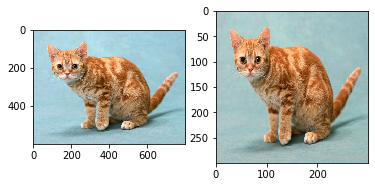

In [24]:
import PIL
import scipy
import imageio
#from scipy.misc import imread, imsave, imresize
from imageio import imread, imsave
#from scipy.misc import imresize
import PIL.Image as Image
import matplotlib.pyplot as plt

# Read an JPEG image into a numpy array
img = imread('assets/cat.jpg')
print (img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
#img_tinted = imresize(img_tinted, (300, 300))
img_tinted=np.array(Image.fromarray(np.uint8(img_tinted)).resize((300, 300)))
                    
# Write the tinted image back to disk
imsave('assets/cat_tinted.jpg', img_tinted)

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

MATLAB文件

函数scipy.io.loadmat和scipy.io.savemat能够让你读和写MATLAB文件。具体请查看文档。
点之间的距离

SciPy定义了一些有用的函数，可以计算集合中点之间的距离。

函数scipy.spatial.distance.pdist能够计算集合中所有两点之间的距离：

In [81]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print (x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print (d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


具体细节请阅读文档。

函数scipy.spatial.distance.cdist可以计算不同集合中点的距离，具体请查看文档。

Matplotlib

Matplotlib是一个作图库。这里简要介绍matplotlib.pyplot模块，功能和MATLAB的作图功能类似。
绘图

matplotlib库中最重要的函数是Plot。该函数允许你做出2D图形，如下：

In [84]:
pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 13.1MB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 92kB 5.7MB/s eta 0:00:011
     |████████████████████████████████| 71kB 9.0MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


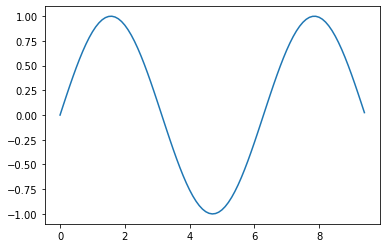

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x) # Plot the points using matplotlib 
plt.plot(x, y)

只需要少量工作，就可以一次画不同的线，加上标签，坐标轴标志等。

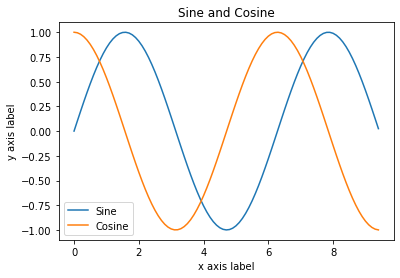

In [86]:
y_sin = np.sin(x) 
y_cos = np.cos(x) 

# Plot the points using matplotlib 
plt.plot(x, y_sin) 
plt.plot(x, y_cos) 
plt.xlabel('x axis label') 
plt.ylabel('y axis label') 
plt.title('Sine and Cosine') 
plt.legend(['Sine', 'Cosine'])

可以在文档中阅读更多关于plot的内容。
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

绘制多个图像

可以使用subplot函数来在一幅图中画不同的东西：

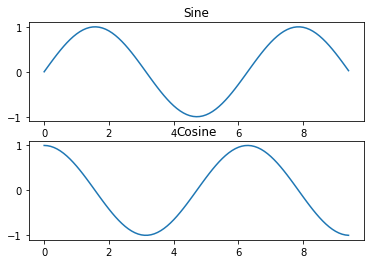

In [87]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x) 
y_cos = np.cos(x) 

# Set up a subplot grid that has height 2 and width 1, 
# and set the first such subplot as active. 
plt.subplot(2, 1, 1) 

# Make the first plot 
plt.plot(x, y_sin) 
plt.title('Sine') 

# Set the second subplot as active, and make the second plot. 
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine') 

# Show the figure. 
plt.show()

You can read much more about the subplot function in the documentation.
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot

Images

You can use the imshow function to show images. Here is an example:

uint8 (600, 800, 3)


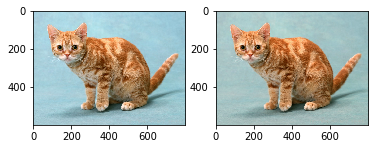

In [25]:
import PIL
import scipy
import imageio
#from scipy.misc import imread, imsave, imresize
from imageio import imread, imsave
#from scipy.misc import imresize
import PIL.Image as Image
import matplotlib.pyplot as plt

# Read an JPEG image into a numpy array
img = imread('assets/cat.jpg')
print (img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

参考文献
[1]Justin Johnson. Python Numpy Tutorial. http://cs231n.github.io/python-numpy-tutorial/
[2]杜客. CS231n课程笔记翻译：Python Numpy教程. https://zhuanlan.zhihu.com/p/20878530?refer=intelligentunit
[3]cs231n课程资料Python Numpy Tutorial的Python3版本. https://blog.csdn.net/NNNNNNNNNNNNY/article/details/53585287?locationNum=7&fps=1